In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 ... 0 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 ... 0 1 0]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 ... 1 0 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 ... 1 0 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 ... 1 0 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


# KNN

Best parameters set found on development set:
 {'n_neighbors': 5, 'weights': 'distance'}

 Best Score 0.46053111600134355

 Grid scores on development set:
0.453 (+/-0.013) for {'n_neighbors': 5, 'weights': 'uniform'}
0.461 (+/-0.015) for {'n_neighbors': 5, 'weights': 'distance'}
0.410 (+/-0.010) for {'n_neighbors': 10, 'weights': 'uniform'}
0.437 (+/-0.013) for {'n_neighbors': 10, 'weights': 'distance'}
0.423 (+/-0.011) for {'n_neighbors': 15, 'weights': 'uniform'}
0.430 (+/-0.012) for {'n_neighbors': 15, 'weights': 'distance'}
0.404 (+/-0.012) for {'n_neighbors': 20, 'weights': 'uniform'}
0.421 (+/-0.017) for {'n_neighbors': 20, 'weights': 'distance'}
0.410 (+/-0.012) for {'n_neighbors': 25, 'weights': 'uniform'}
0.418 (+/-0.012) for {'n_neighbors': 25, 'weights': 'distance'}
0.403 (+/-0.008) for {'n_neighbors': 30, 'weights': 'uniform'}
0.413 (+/-0.010) for {'n_neighbors': 30, 'weights': 'distance'}
0.404 (+/-0.010) for {'n_neighbors': 35, 'weights': 'uniform'}
0.411 (+/-0.012) for 

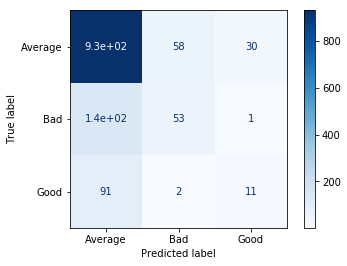

In [3]:
from sklearn.neighbors import KNeighborsClassifier
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.43033782 0.42738405 0.44495435 0.42356051 0.44778172]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'n_neighbors': 5, 'weights': 'uniform'}

 Best Score 0.30085479713815233

 Grid scores on development set:
0.301 (+/-0.010) for {'n_neighbors': 5, 'weights': 'uniform'}
0.301 (+/-0.010) for {'n_neighbors': 5, 'weights': 'distance'}
0.296 (+/-0.000) for {'n_neighbors': 10, 'weights': 'uniform'}
0.296 (+/-0.000) for {'n_neighbors': 10, 'weights': 'distance'}
0.296 (+/-0.000) for {'n_neighbors': 15, 'weights': 'uniform'}
0.296 (+/-0.000) for {'n_neighbors': 15, 'weights': 'distance'}
0.296 (+/-0.000) for {'n_neighbors': 20, 'weights': 'uniform'}
0.296 (+/-0.000) for {'n_neighbors': 20, 'weights': 'distance'}
0.296 (+/-0.000) for {'n_neighbors': 25, 'weights': 'uniform'}
0.296 (+/-0.000) for {'n_neighbors': 25, 'weights': 'distance'}
0.296 (+/-0.000) for {'n_neighbors': 30, 'weights': 'uniform'}
0.296 (+/-0.000) for {'n_neighbors': 30, 'weights': 'distance'}
0.296 (+/-0.000) for {'n_neighbors': 35, 'weights': 'uniform'}
0.296 (+/-0.000) for {

C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Testing score:  0.29118445492213174

Training Score:  0.2956134774316593


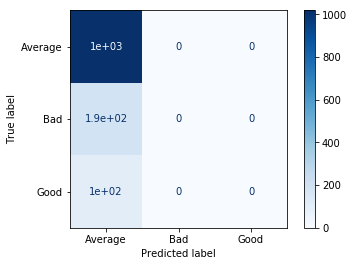

In [6]:
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.30966939 0.29469214 0.29481733 0.29481733 0.2946593 ]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 0 1]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 1 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 1 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 1 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'n_neighbors': 5, 'weights': 'uniform'}

 Best Score 0.45652613784673807

 Grid scores on development set:
0.457 (+/-0.010) for {'n_neighbors': 5, 'weights': 'uniform'}
0.453 (+/-0.012) for {'n_neighbors': 5, 'weights': 'distance'}
0.408 (+/-0.009) for {'n_neighbors': 10, 'weights': 'uniform'}
0.431 (+/-0.010) for {'n_neighbors': 10, 'weights': 'distance'}
0.411 (+/-0.019) for {'n_neighbors': 15, 'weights': 'uniform'}
0.423 (+/-0.010) for {'n_neighbors': 15, 'weights': 'distance'}
0.386 (+/-0.007) for {'n_neighbors': 20, 'weights': 'uniform'}
0.403 (+/-0.017) for {'n_neighbors': 20, 'weights': 'distance'}
0.403 (+/-0.010) for {'n_neighbors': 25, 'weights': 'uniform'}
0.403 (+/-0.008) for {'n_neighbors': 25, 'weights': 'distance'}
0.391 (+/-0.018) for {'n_neighbors': 30, 'weights': 'uniform'}
0.404 (+/-0.013) for {'n_neighbors': 30, 'weights': 'distance'}
0.388 (+/-0.014) for {'n_neighbors': 35, 'weights': 'uniform'}
0.399 (+/-0.011) for {

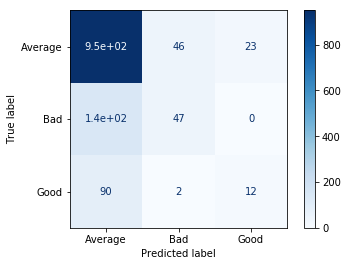

In [9]:
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.44487785 0.44227237 0.46018465 0.42206931 0.42161466]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.2668990480532727 0.7955195541058508 -0.31189174404518605
  -0.06279000616091403]
 [-0.11249211937670339 0.11386167290926646 0.7960057304498621
  -0.566522736475527]
 [0.7533508178888383 -0.16531012330588044 -0.13103281872338923
  -0.029475859314786697]
 ...
 [0.7521852812229466 -0.16344152965792963 -0.13094237177940624
  -0.025483097537655243]
 [0.7517777704386579 -0.1613423366153525 -0.13139539788714713
  -0.020865925132946238]
 [-0.11242004274209731 0.11253824516972548 0.7963608411917731
  -0.5693779640319709]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'n_neighbors': 5, 'weights': 'distance'}

 Best Score 0.4260254077643326

 Grid scores on development set:
0.394 (+/-0.013) for {'n_neighbors': 5, 'weights': 'uniform'}
0.426 (+/-0.009) for {'n_neighbors': 5, 'weights': 'distance'}
0.372 (+/-0.015) for {'n_neighbors': 10, 'weights': 'uniform'}
0.400 (+/-0.009) for {'n_neighbors': 10, 'weights': 'distance'}
0.373 (+/-0.012) for {'n_neighbors': 15, 'weights': 'uniform'}
0.390 (+/-0.011) for {'n_neighbors': 15, 'weights': 'distance'}
0.360 (+/-0.009) for {'n_neighbors': 20, 'weights': 'uniform'}
0.387 (+/-0.012) for {'n_neighbors': 20, 'weights': 'distance'}
0.360 (+/-0.010) for {'n_neighbors': 25, 'weights': 'uniform'}
0.380 (+/-0.010) for {'n_neighbors': 25, 'weights': 'distance'}
0.355 (+/-0.007) for {'n_neighbors': 30, 'weights': 'uniform'}
0.373 (+/-0.014) for {'n_neighbors': 30, 'weights': 'distance'}
0.356 (+/-0.007) for {'n_neighbors': 35, 'weights': 'uniform'}
0.370 (+/-0.014) for {

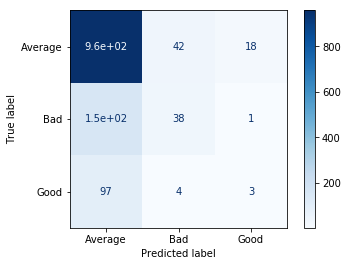

In [12]:
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.37775018 0.41620715 0.43127477 0.40137825 0.41724076]
